In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 数据读取-图片

- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [3]:
#读取彩色图
img = cv2.imread('../0-Datas/images/lena.jpg') #opencv读取格式为BGR,而matplotlib是RGB
print(img.shape)

#读取灰度图
img = cv2.imread('../0-Datas/images/lena.jpg',cv2.IMREAD_GRAYSCALE)
print(img.shape)

(263, 263, 3)
(263, 263)


In [4]:
#图像的显示（灰度图）
cv2.imshow('image',img)
cv2.waitKey(0) #0代表任意键退出
#cv2.waitKey(10000) #10秒后退出
cv2.destroyAllWindows()

In [5]:
#保存
cv2.imwrite('../0-Datas/images/huidulena.jpg',img)

True

In [6]:
#基本属性
print(type(img))
print(img.size) #像素点数量
print(img.dtype)

<class 'numpy.ndarray'>
69169
uint8


# 数据读取-视频

- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1。
- 如果是视频文件，直接指定好路径即可。

In [10]:
vc= cv2.VideoCapture('../0-Datas/videos/001.mp4')

In [11]:
if vc.isOpened():
    open,frame = vc.read() #open返回bool值，frame返回当前帧的图像
    print('当前帧没问题')
else:
    open = False

当前帧没问题


In [12]:
while open:
    ret,frame = vc.read()
    if frame is None: #判断是否读完
        break
    if ret == True: #当前帧没问题
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(8) & 0xff == 27:
            break
vc.release()
cv2.destroyAllWindows()

# 截取部分图像数据
<br>

In [13]:
#定义函数
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [20]:
img = cv2.imread('../0-Datas/images/lena.jpg')
imgs = img[0:100,0:200] #列,行(第一个0:100为竖直方向长度,第二个0:200为横向长度方向)
cv_show('imgs',imgs)
print(imgs.shape)

(100, 200, 3)


# 颜色通道提取
<br>

In [21]:
b,g,r = cv2.split(img)

In [22]:
#不同颜色维度都是一样的，只是像素点不一样
print(b.shape)
print(g.shape)
print(r.shape)
print()

#合并
img_con = cv2.merge((b,g,r))
print(img_con.shape)

(263, 263)
(263, 263)
(263, 263)

(263, 263, 3)


### B,G,R索引为0,1,2

In [23]:
#只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [24]:
#只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [25]:
#只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

# 边界填充

- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

In [30]:
img = cv2.imread('../0-Datas/images/cat.jpg')

top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE) #其中之一
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_CONSTANT,value=0)

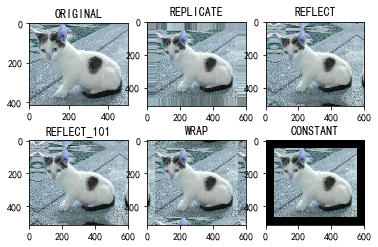

In [31]:
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE') #复制法
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT') #反射法(相当于镜面)
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101') #反射法(相当于更好的镜面)
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP') #外包装法
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT') #常量法,用0填充

plt.show()

# 数值计算
<br>

In [34]:
img1 = cv2.imread('../0-Datas/images/cat.jpg')
img2 = cv2.imread('../0-Datas/images/dog.jpg')

In [35]:
img1[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [36]:
img1s = img1+10 
img1s[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [118, 122, 128, ..., 165, 164, 163],
       [118, 120, 128, ..., 166, 165, 164],
       [149, 151, 158, ..., 166, 165, 164],
       [163, 166, 173, ..., 170, 169, 168]], dtype=uint8)

In [40]:
#相当于 %256
img1[:5,:,0] + img1s[:5,:,0]

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [41]:
#如果相加结果大于255就等于255，否则就是相加结果
cv2.add(img1,img1s)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [226, 230, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# 图像融合
<br>

In [43]:
img1 + img2 #维度不同，无法直接相加

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [48]:
print(img1.shape)
print(img2.shape)

(414, 500, 3)
(429, 499, 3)


In [49]:
#改变维度(reshape无用)
img2 = cv2.resize(img2,(500,414)) #先列再行

### R = αx1 + βx2 + b

In [50]:
resobject = cv2.addWeighted(img1,0.4,img2,0.6,0) #x1:img1, α:0.6, x2:img2, β:0.4, b:0
cv_show('resobject',resobject)

### 按比例展示

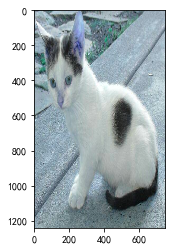

In [52]:
res = cv2.resize(img1,(0,0),fx=1.5,fy=3) #fx是列,fy是行
plt.imshow(res)